In [1]:
#import dependancies
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st

In [2]:
#read in data
data = pd.read_csv('/Users/kscomputer/Desktop/Project_1/Project_1/output_data/oxford_clean3.csv')
data.head()

,CountryName,Date,C1_School_closing,C2_Workplace_closing,C6_Stay_home_requirements,E1_Income_support,E3_Fiscal_measures,H6_Facial_coverings,ConfirmedCases,ConfirmedDeaths
0,Brazil,20200101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Brazil,20200102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Brazil,20200103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Brazil,20200104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Brazil,20200105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y%m%d')

In [4]:
#narrow down data to just mandataes
info = pd.DataFrame(data, columns= ["CountryName", "Date", "C1_School_closing", "C2_Workplace_closing",
                                         "C6_Stay_home_requirements", "E1_Income_support","H6_Facial_coverings"])
info.describe().T
#everything below 1.4 is relaxed mandate country. everything above is strict country
info_mean = info.describe().T['50%'].mean()
info_mean  

1.4

In [5]:
info = info.astype({'C1_School_closing': 'int', 'C2_Workplace_closing': 'int', 
                    'C6_Stay_home_requirements': 'int', 'E1_Income_support':'int',
                            'H6_Facial_coverings': 'int'}) 

In [6]:
#brazil country by itself with total mean labeled as brazil total and insight summary df for looking to see if there is any further insights to explore
brazil = info.loc[info['CountryName']=='Brazil']
brazil_mean = brazil.mean()
brazil_sum = brazil_mean.sum()
brazil_total = (brazil_sum/5)
#china country by itself with total mean labeled as china total and insight summary df for looking to see if there is any further insights to explore
china = info.loc[info['CountryName']=='China']
china_mean = china.mean()
china_sum = china_mean.sum()
china_total = (china_sum/5)
#uk country by itself with total mean labeled as uk total and insight summary df for looking to see if there is any further insights to explore
uk = info.loc[info['CountryName']=='United Kingdom']
uk_mean = uk.mean()
uk_sum = uk_mean.sum()
uk_total = (uk_sum/5)
#itlay country by itself with total mean labeled as italy total and insight summary df for looking to see if there is any further insights to explore
italy = info.loc[info['CountryName']=='Italy']
italy_mean = italy.mean()
italy_sum = italy_mean.sum()
italy_total = (italy_sum/5)
#japan country by itself with total mean labeled as japan total and insight summary df for looking to see if there is any further insights to explore
japan = info.loc[info['CountryName']=='Japan']
japan_mean = japan.mean()
japan_sum = japan_mean.sum()
japan_total = (japan_sum/5)
#New Zealand country by itself with total mean labeled as New Zealand total and insight summary df for looking to see if there is any further insights to explore
nz = info.loc[info['CountryName']=='New Zealand']
nz_mean = nz.mean()
nz_sum = nz_mean.sum()
nz_total = (nz_sum/5)
#sweden country by itself with total mean labeled as sweden total and insight summary df for looking to see if there is any further insights to explore
meatball = info.loc[info['CountryName']=='Sweden']
meatball_mean = meatball.mean()
meatball_sum = meatball_mean.sum()
meatball_total = (meatball_sum/5)
#united states country by itself with total mean labeled as united states total and insight summary df for looking to see if there is any further insights to explore
us = info.loc[info['CountryName']=='United States']
us_mean = us.mean()
us_sum = us_mean.sum()
us_total = (us_sum/5)

In [7]:
#summary df with country and average mandate
total = {'Country':['China','Brazil','United States','Italy','United Kingdom'
                   ,'Japan','New Zealand','Sweden'],
         'Average Mandate':[china_total, brazil_total, us_total, italy_total,
                           uk_total,japan_total, nz_total, meatball_total]}


sum_df = pd.DataFrame(total)

sum_df

,Country,Average Mandate
0,China,1.995380
1,Brazil,1.860927
2,United States,1.820805
3,Italy,1.645946
4,United Kingdom,1.298693
5,Japan,0.792834
6,New Zealand,0.769024
7,Sweden,0.540864


In [8]:
#1.4 was the mean of the 50% column above on .describe(), making the df below the Strict countries
strict_df = sum_df.loc[sum_df['Average Mandate']>=1.4]
strict_df

,Country,Average Mandate
0,China,1.995380
1,Brazil,1.860927
2,United States,1.820805
3,Italy,1.645946


In [9]:
##1.4 was the mean of the 50% column above on .describe(), making the df below the relax countries
lax_df = sum_df.loc[sum_df['Average Mandate']<=1.4]
lax_df

,Country,Average Mandate
4,United Kingdom,1.298693
5,Japan,0.792834
6,New Zealand,0.769024
7,Sweden,0.540864


In [10]:
#The values below are from "worldometers.info"
# Total populations as of Jan 1, 2020.
braz_pop = 212559417
china_pop = 1408526449
ital_pop = 60005743
jp_pop = 125938348
nz_pop = 4822233
swe_pop = 10151866
uk_pop = 66575226
us_pop = 330380000

# Create a list containing the total populations of each conutry
pops = (braz_pop, china_pop, ital_pop, jp_pop, nz_pop, swe_pop, uk_pop, us_pop)

# Locate the most recent date data is available for all countries
last_df=data.loc[data['Date']=='2020-10-22']
last_df= last_df[['CountryName','Date','ConfirmedCases','ConfirmedDeaths']]
 
#Add a column to e new DF containing total populations for analysis purposes
last_df['Total Population'] = pops

# # Calculate the Percentage of Each Country Infected and Deceased
perc_cases = (last_df['ConfirmedCases']/last_df['Total Population'])
perc_deaths = (last_df['ConfirmedDeaths']/last_df['Total Population'])

last_df['Percent Infected'] = perc_cases
last_df['Percent Deceased'] = perc_deaths


last_df

,CountryName,Date,ConfirmedCases,ConfirmedDeaths,Total Population,Percent Infected,Percent Deceased
295,Brazil,2020-10-22,5298772.0,155403.0,212559417,0.024928,0.000731
597,China,2020-10-22,91044.0,4739.0,1408526449,0.000065,0.000003
899,United Kingdom,2020-10-22,789229.0,44158.0,60005743,0.013153,0.000736
1206,Italy,2020-10-22,449648.0,36832.0,125938348,0.003570,0.000292
1502,Japan,2020-10-22,94524.0,1685.0,4822233,0.019602,0.000349
1800,New Zealand,2020-10-22,1558.0,25.0,10151866,0.000153,0.000002
2106,Sweden,2020-10-22,109326.0,5917.0,66575226,0.001642,0.000089
2406,United States,2020-10-22,8336282.0,222201.0,330380000,0.025232,0.000673


In [11]:
# summary df with strict mandate country total confirmed cases
strict_max = last_df.loc[last_df['CountryName'].isin(['China','Brazil','United States','Italy'])]
strict_max

,CountryName,Date,ConfirmedCases,ConfirmedDeaths,Total Population,Percent Infected,Percent Deceased
295,Brazil,2020-10-22,5298772.0,155403.0,212559417,0.024928,0.000731
597,China,2020-10-22,91044.0,4739.0,1408526449,0.000065,0.000003
1206,Italy,2020-10-22,449648.0,36832.0,125938348,0.003570,0.000292
2406,United States,2020-10-22,8336282.0,222201.0,330380000,0.025232,0.000673


In [12]:
# summary df with relaxed mandate country total confirmed cases
lax_max = last_df.loc[last_df['CountryName'].isin(['United Kingdom','Japan','New Zealand','Sweden'])]
lax_max

,CountryName,Date,ConfirmedCases,ConfirmedDeaths,Total Population,Percent Infected,Percent Deceased
899,United Kingdom,2020-10-22,789229.0,44158.0,60005743,0.013153,0.000736
1502,Japan,2020-10-22,94524.0,1685.0,4822233,0.019602,0.000349
1800,New Zealand,2020-10-22,1558.0,25.0,10151866,0.000153,0.000002
2106,Sweden,2020-10-22,109326.0,5917.0,66575226,0.001642,0.000089


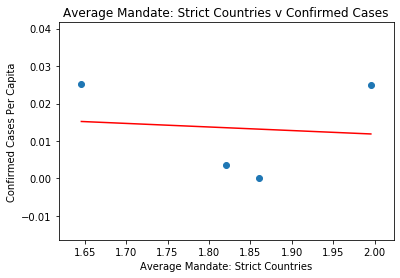

(-0.10165156100360923, 0.8983484389963907)

In [22]:
#linear regression strict mandates v strict cases
x_values = strict_df['Average Mandate']
y_values = strict_max['Percent Infected']
(slope, intercept, rvalue, pvalue, stdeer) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = 'y=' +str(round(slope,2))+'x + ' +str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
#plt.annotate(line_eq,(15,10),fontsize = 25, color='red')
plt.title('Average Mandate: Strict Countries v Confirmed Cases')
plt.xlabel('Average Mandate: Strict Countries')
plt.ylabel('Confirmed Cases Per Capita')
plt.show()

#pearsonr for strict mandates v strict cases
correlation = st.pearsonr(strict_df['Average Mandate'], strict_max['Percent Infected'])
correlation

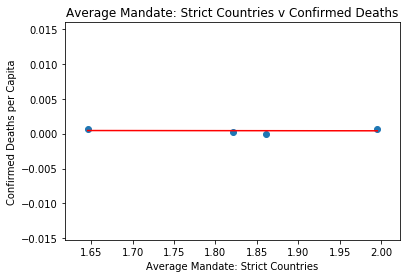

(-0.045786884620321544, 0.9542131153796785)

In [23]:
#linear regression strict mandates v strict deaths
x_values = strict_df['Average Mandate']
y_values = strict_max['Percent Deceased']
(slope, intercept, rvalue, pvalue, stdeer) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = 'y=' +str(round(slope,2))+'x + ' +str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
#plt.annotate(line_eq,(15,10),fontsize = 25, color='red')
plt.title('Average Mandate: Strict Countries v Confirmed Deaths')
plt.xlabel('Average Mandate: Strict Countries')
plt.ylabel('Confirmed Deaths per Capita')
plt.show()

correlation = st.pearsonr(strict_df['Average Mandate'], strict_max['Percent Deceased'])
correlation

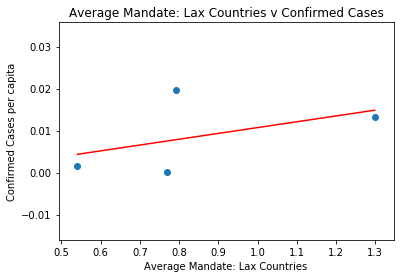

(0.4743873639494396, 0.5256126360505604)

In [24]:
#linear regression relaxed mandates v relaxed cases
x_values = lax_df['Average Mandate']
y_values = lax_max['Percent Infected']
(slope, intercept, rvalue, pvalue, stdeer) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = 'y=' +str(round(slope,2))+'x + ' +str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
#plt.annotate(line_eq,(15,10),fontsize = 25, color='red')
plt.title('Average Mandate: Lax Countries v Confirmed Cases')
plt.xlabel('Average Mandate: Lax Countries')
plt.ylabel('Confirmed Cases per capita')
plt.show()

#pearsonr for relaxed mandates v relaxed cases
correlation = st.pearsonr(lax_df['Average Mandate'], lax_max['Percent Infected'])
correlation

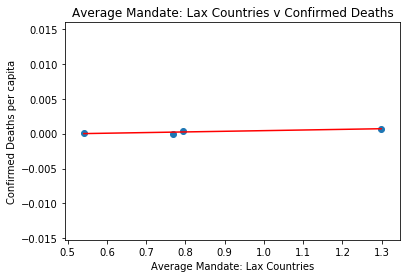

(0.8930122042396358, 0.10698779576036421)

In [25]:
#linear regression relaxed mandates v relaxed deaths
x_values = lax_df['Average Mandate']
y_values = lax_max['Percent Deceased']
(slope, intercept, rvalue, pvalue, stdeer) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = 'y=' +str(round(slope,2))+'x + ' +str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
#plt.annotate(line_eq,(15,10),fontsize = 25, color='red')
plt.title('Average Mandate: Lax Countries v Confirmed Deaths')
plt.xlabel('Average Mandate: Lax Countries')
plt.ylabel('Confirmed Deaths per capita')
plt.show()

#pearsonr for relaxed mandates v relaxed deaths
correlation = st.pearsonr(lax_df['Average Mandate'], lax_max['Percent Deceased'])
correlation

WHAT DID COUNTRIES SPENDING LOOK LIKE VS CONFIRMED COVID CASES AND DID IT HAVE ANY EFFECT?

In [17]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y%m%d')
data.set_index('CountryName')

,Date,C1_School_closing,C2_Workplace_closing,C6_Stay_home_requirements,E1_Income_support,E3_Fiscal_measures,H6_Facial_coverings,ConfirmedCases,ConfirmedDeaths
CountryName,,,,,,,,,
Brazil,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Brazil,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Brazil,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Brazil,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Brazil,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
United States,2020-10-21,3.0,2.0,2.0,2.0,0.0,4.0,8273304.0,221066.0
United States,2020-10-22,3.0,2.0,2.0,2.0,0.0,4.0,8336282.0,222201.0
United States,2020-10-23,3.0,2.0,2.0,2.0,0.0,4.0,8408340.0,223042.0


In [18]:
#narrow down to just economic mandates and additional spending e3
df = data[['CountryName','E3_Fiscal_measures','ConfirmedCases','ConfirmedDeaths']]
df.head()

,CountryName,E3_Fiscal_measures,ConfirmedCases,ConfirmedDeaths
0,Brazil,0.0,0.0,0.0
1,Brazil,0.0,0.0,0.0
2,Brazil,0.0,0.0,0.0
3,Brazil,0.0,0.0,0.0
4,Brazil,0.0,0.0,0.0


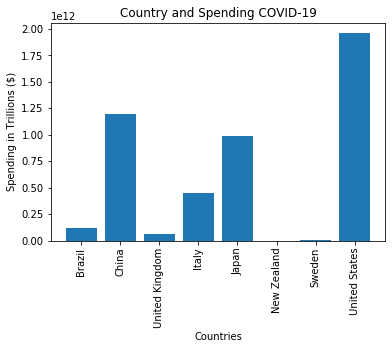

In [19]:
plt.bar(df['CountryName'],df['E3_Fiscal_measures'])
plt.xticks(rotation='vertical')
plt.title('Country and Spending COVID-19')
plt.xlabel('Countries')
plt.ylabel('Spending in Trillions ($)')
plt.show()

In [20]:
us = df.loc[df['CountryName']=='United States']
us_sum = us['E3_Fiscal_measures'].sum()
china = df.loc[df['CountryName']=='China']
china_sum = china['E3_Fiscal_measures'].sum()
uk = df.loc[df['CountryName']=='United Kingdom']
uk_sum = uk['E3_Fiscal_measures'].sum()
italy = df.loc[df['CountryName']=='Italy']
italy_sum = italy['E3_Fiscal_measures'].sum()
meatball = df.loc[df['CountryName']=='Sweden']
sweden_sum = meatball['E3_Fiscal_measures'].sum()
japan = df.loc[df['CountryName']=='Japan']
japan_sum = japan['E3_Fiscal_measures'].sum()
nz = df.loc[df['CountryName']=='New Zealand']
nz_sum = nz['E3_Fiscal_measures'].sum()
brazil = df.loc[df['CountryName']=='Brazil']
brazil_sum = brazil['E3_Fiscal_measures'].sum()

total = {'CountryName':['China','Brazil','United States','Italy','United Kingdom'
                    ,'Japan','New Zealand','Sweden'],
          'Total Spending':[china_sum, brazil_sum, us_sum, italy_sum,
                            uk_sum,japan_sum, nz_sum, sweden_sum]}

sum_df = pd.DataFrame(data = total)
#sum_df.style.format('${:,.2f}')

sum_df
money = pd.merge(sum_df, last_df, how='outer')
perc_spent = (money['Total Spending']/money['Total Population'])
money['Percent Per Capita Spent'] = perc_spent
money

,CountryName,Total Spending,Date,ConfirmedCases,ConfirmedDeaths,Total Population,Percent Infected,Percent Deceased,Percent Per Capita Spent
0,China,2.136809e+12,2020-10-22,91044.0,4739.0,1408526449,0.000065,0.000003,1517.052805
1,Brazil,1.858207e+11,2020-10-22,5298772.0,155403.0,212559417,0.024928,0.000731,874.205914
2,United States,2.535200e+12,2020-10-22,8336282.0,222201.0,330380000,0.025232,0.000673,7673.587990
3,Italy,5.420222e+11,2020-10-22,449648.0,36832.0,125938348,0.003570,0.000292,4303.869161
4,United Kingdom,1.812783e+11,2020-10-22,789229.0,44158.0,60005743,0.013153,0.000736,3021.016659
5,Japan,1.005522e+12,2020-10-22,94524.0,1685.0,4822233,0.019602,0.000349,208517.821692
6,New Zealand,0.000000e+00,2020-10-22,1558.0,25.0,10151866,0.000153,0.000002,0.000000
7,Sweden,8.162169e+09,2020-10-22,109326.0,5917.0,66575226,0.001642,0.000089,122.600696


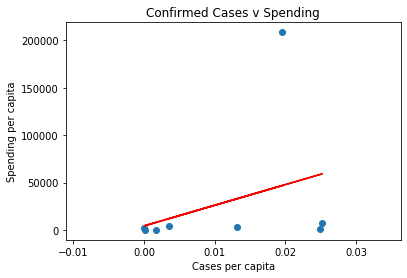

(0.3302067854847962, 0.42439584507564754)

In [33]:
x_values = money['Percent Infected']
y_values = money['Percent Per Capita Spent']
(slope, intercept, rvalue, pvalue, stdeer) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = 'y=' +str(round(slope,2))+'x + ' +str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
#plt.annotate(line_eq,(15,10),fontsize = 25, color='red')
plt.title('Confirmed Cases v Spending')
plt.xlabel('Cases per capita')
plt.ylabel('Spending per capita')
plt.show()

correlation = st.pearsonr(money['Percent Infected'],money['Percent Per Capita Spent'] )
correlation

Little relationship between countries spending and total cases. Through the Pearson r correlation we can see that there is almost no relationship between spending and case amounts.